In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing, basinhopping
import os 

from scipy.stats import betabinom, poisson, norm
from ts_utils.deconvolution import *
import seaborn as sns

In [3]:
incubation_period = pd.read_csv('incubation_period.csv')['real_world']

There are 7 levels.


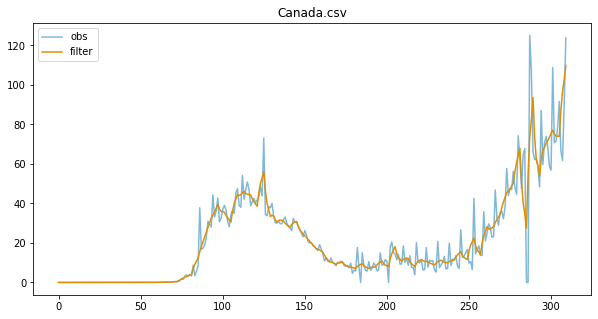

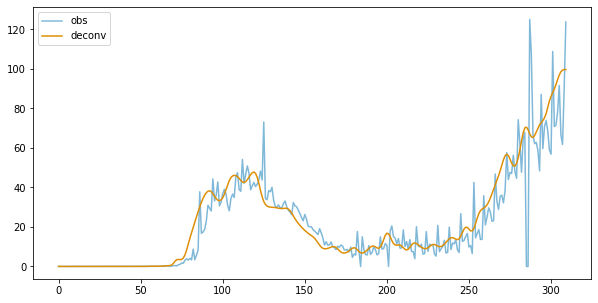

There are 7 levels.


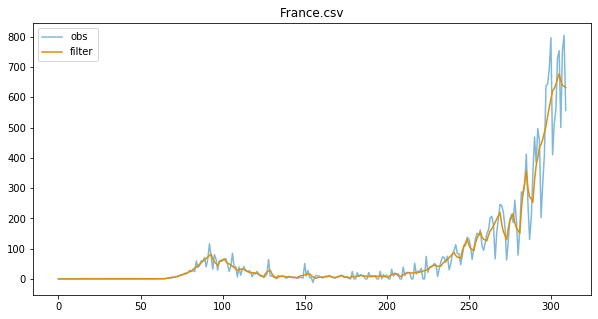

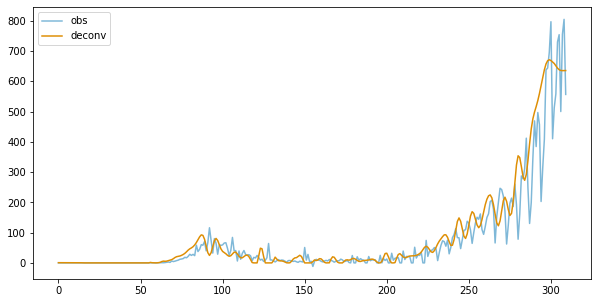

There are 7 levels.


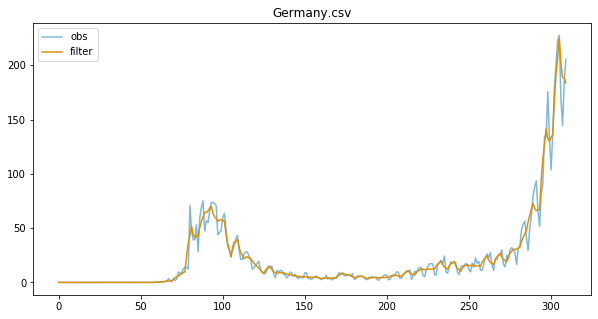

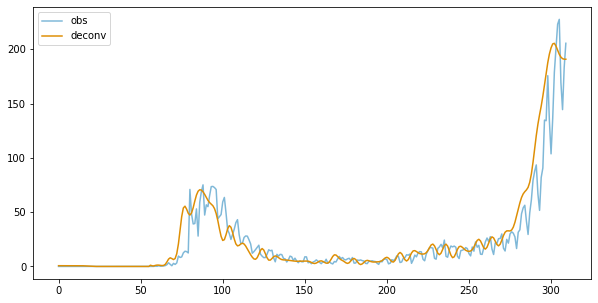

There are 7 levels.


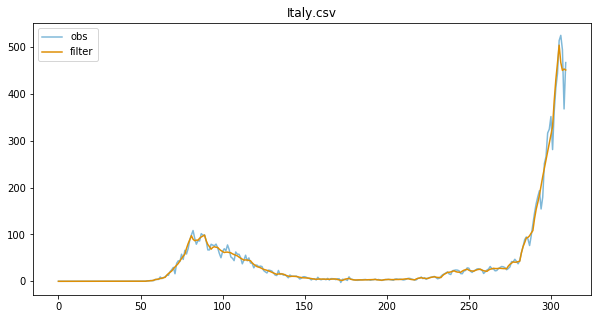

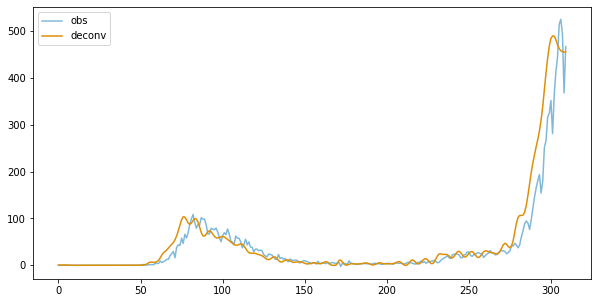

There are 7 levels.


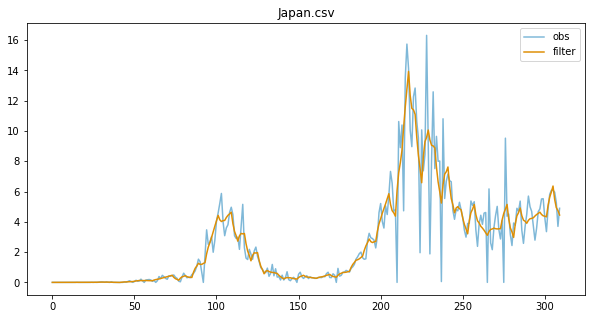

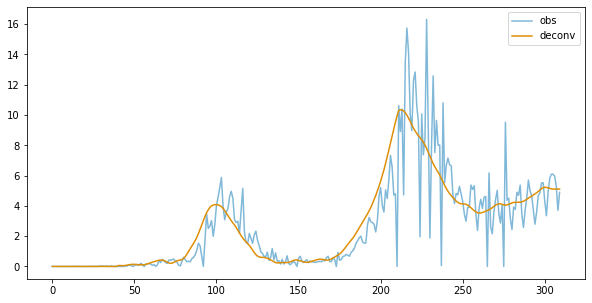

There are 7 levels.


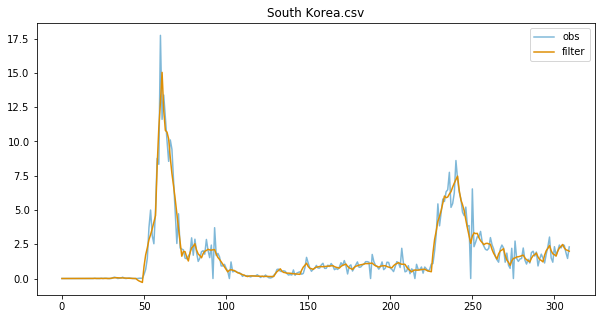

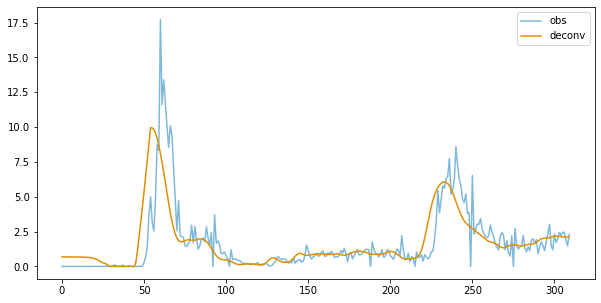

There are 7 levels.


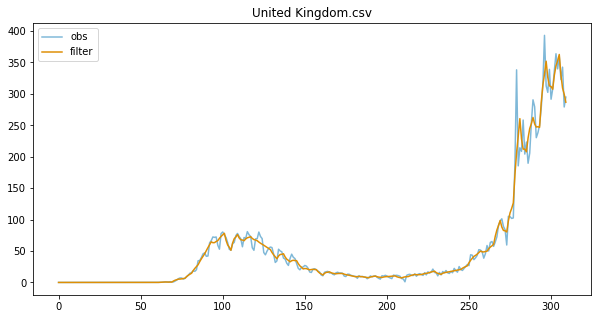

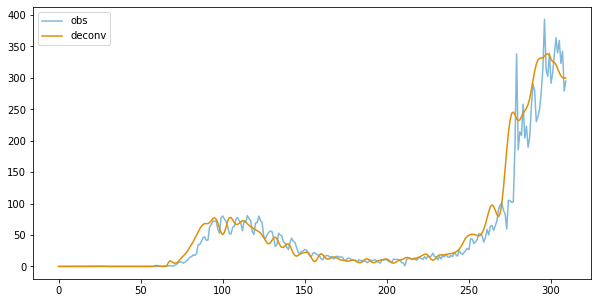

There are 7 levels.


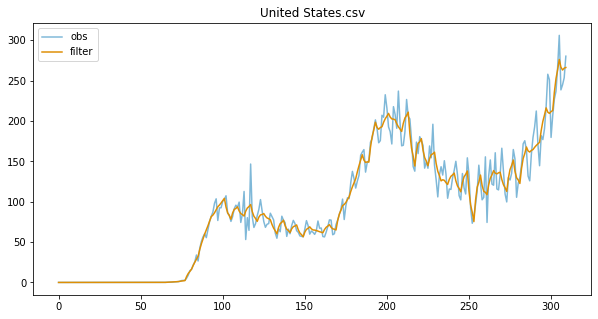

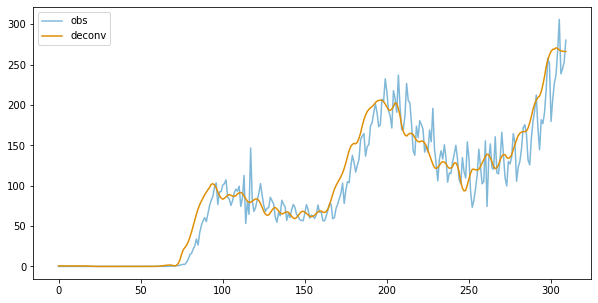

In [93]:
#cutoffs = [10,]
sns.set_palette('colorblind')
for i, country in enumerate(os.listdir('data')):
    if not (country=='owid-covid-data.xlsx' or country=='process_noise_SEIR.csv'):
        simulation = pd.read_csv('data/' + country)
        obs_symptomatic_incidence = simulation['new_cases_per_million']
        
        filtered = wavelet_lp_filter(obs_symptomatic_incidence, 5, wavelet='db2')
        rl_optimizer_filter = opt_deconv(filtered,incubation_period, a=1E5, degree=2).x
        plt.figure(figsize=(10, 5))
 #   plt.title(deconv_names[i])
     #   plt.plot(rl_optimizer_filter, label='deconv')
        plt.title(country)
        plt.plot(obs_symptomatic_incidence, label='obs',alpha=0.5)
        plt.plot(filtered, label='filter')
        plt.legend()
        plt.savefig('figures/'+country+'_filter.png')
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.plot(obs_symptomatic_incidence, label='obs',alpha=0.5)
        plt.plot(rl_optimizer_filter,  label='deconv')
        plt.legend()
        plt.savefig('figures/'+country+'_deconv_filter.png')
        plt.show()
  #  plt.legend()
   # plt.ylim(0,)
 #   plt.savefig('figures/seir'+ deconv_names[i]+'.png')